# Telco churn

## Import Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl


pd.set_option('display.max_columns', 100)

In [3]:
tlc_db = pd.read_csv("TelcoChurn.csv")
tlc_db.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
tlc_db.shape

(7043, 21)

Our Dataset initially has 7043 observations and 21 predictors

In [5]:
tlc_db.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Looking at the types of the predictors we notice that there are many boolean varaibles readed as objects

# Data analysis and cleaning

* Once we've found all available info areas that we want to use, we proceed to the table exploration. 
* The goal is familiarise with data find errors / dirt request clarifications to the customer 
* Let's start with the base table, containing the analysis scope with customer info. 
* We use describe method to have a global vision of data statistics.

In [6]:
tlc_db.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,1818-ESQMW,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


'Total Charges', as we've seen, is an object so we want to convert it to a float element. But first we have to replace spaces with 'NaN'.

In [7]:
tlc_db['TotalCharges'] = tlc_db["TotalCharges"].replace(" ",np.nan)

## Seeking for Na values
* As we could expect thare are some NA values in TotalCharges column..we introduced them! 
* Anyway, is better having NAs than blank spaces..it's easier to deal with them.

In [8]:
tlc_db.columns[tlc_db.isna().any()].tolist()

['TotalCharges']

In [9]:
tlc_db.loc[tlc_db['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


We found NAs only in the *TotalCharges* variablie. Due to that, we want to replace this values with 0 and convert the type as a float variable, because those are the records with *tenure=0* so they actually didn't pay

In [10]:
tlc_db['TotalCharges'] = tlc_db["TotalCharges"].replace(np.nan,0)

In [11]:
tlc_db["TotalCharges"] = tlc_db["TotalCharges"].astype(float)

**Check**

In [12]:
tlc_db.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,1818-ESQMW,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2279.734304,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.794470,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,0.000000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,398.550000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1394.550000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3786.600000,NaN


Now our Dataset is clean, there are no missing values

## Analyzing columns

In [13]:
tlc_db['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [14]:
tlc_db['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [15]:
tlc_db['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

* It's useful to deal with binary categorical variable by transforming to binary numerical (0/1) variable.
* We're going to do it with *Partner,Dependents,PhoneService,PaperlessBilling,Churn*.

## Transforming "yes/no" into "0/1"

In [16]:
tlc_db[['Partner','Dependents','PhoneService','PaperlessBilling','Churn']] = tlc_db[['Partner','Dependents','PhoneService','PaperlessBilling','Churn']].replace({'No': 0, 'Yes': 1})
tlc_db['gender'] = tlc_db['gender'].replace({'Male': 0, 'Female': 1})
tlc_db.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043.000000,7043.000000,7043.000000
unique,7043,NaN,NaN,NaN,NaN,NaN,NaN,3,3,3,3,3,3,3,3,3,NaN,4,NaN,NaN,NaN
top,1818-ESQMW,NaN,NaN,NaN,NaN,NaN,NaN,No,Fiber optic,No,No,No,No,No,No,Month-to-month,NaN,Electronic check,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,3390,3096,3498,3088,3095,3473,2810,2785,3875,NaN,2365,NaN,NaN,NaN
mean,NaN,0.495244,0.162147,0.483033,0.299588,32.371149,0.903166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.592219,NaN,64.761692,2279.734304,0.265370
std,NaN,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.491457,NaN,30.090047,2266.794470,0.441561
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,18.250000,0.000000,0.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,35.500000,398.550000,0.000000
50%,NaN,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,70.350000,1394.550000,0.000000
75%,NaN,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,89.850000,3786.600000,1.000000


* With categorical variable that have more than 2 catgories have to be trasformed using the so called **One hot encoding** techinque

## Our 'One hot encoding' code

In [17]:
tlc_db1 = tlc_db.copy()

columns1 = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

for colnames in columns1:
    mlt = pd.get_dummies(tlc_db1[colnames])
    list1 = list(mlt.columns.values)
    listaname = []
    for i in list1:
        string = "" 
        for y in i.split():
            string += y.capitalize()
        listaname.append(colnames+'_'+string)

    mlt.set_axis(listaname, axis='columns', inplace=True)
    tlc_db1.drop(colnames, axis = 1, inplace=True)
    tlc_db1 = pd.concat([tlc_db1, mlt], axis = 1)

**We do not need to leave the column 'customerID' as a predictor, because it is obviously not relevant, so we drop it**

In [18]:
tlc_db1.drop('customerID',1,inplace=True)
tlc_db1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_NoPhoneService,MultipleLines_Yes,InternetService_Dsl,InternetService_FiberOptic,InternetService_No,OnlineSecurity_No,OnlineSecurity_NoInternetService,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_NoInternetService,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_NoInternetService,DeviceProtection_Yes,TechSupport_No,TechSupport_NoInternetService,TechSupport_Yes,StreamingTV_No,StreamingTV_NoInternetService,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_NoInternetService,StreamingMovies_Yes,Contract_Month-to-month,Contract_OneYear,Contract_TwoYear,PaymentMethod_BankTransfer(automatic),PaymentMethod_CreditCard(automatic),PaymentMethod_ElectronicCheck,PaymentMethod_MailedCheck
0,1,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [19]:
tlc_db1.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_NoPhoneService,MultipleLines_Yes,InternetService_Dsl,InternetService_FiberOptic,InternetService_No,OnlineSecurity_No,OnlineSecurity_NoInternetService,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_NoInternetService,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_NoInternetService,DeviceProtection_Yes,TechSupport_No,TechSupport_NoInternetService,TechSupport_Yes,StreamingTV_No,StreamingTV_NoInternetService,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_NoInternetService,StreamingMovies_Yes,Contract_Month-to-month,Contract_OneYear,Contract_TwoYear,PaymentMethod_BankTransfer(automatic),PaymentMethod_CreditCard(automatic),PaymentMethod_ElectronicCheck,PaymentMethod_MailedCheck
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.495244,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2279.734304,0.265370,0.481329,0.096834,0.421837,0.343746,0.439585,0.216669,0.496663,0.216669,0.286668,0.438450,0.216669,0.344881,0.439443,0.216669,0.343888,0.493114,0.216669,0.290217,0.398978,0.216669,0.384353,0.395428,0.216669,0.387903,0.550192,0.209144,0.240664,0.219225,0.216101,0.335794,0.228880
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.794470,0.441561,0.499687,0.295752,0.493888,0.474991,0.496372,0.412004,0.500024,0.412004,0.452237,0.496232,0.412004,0.475363,0.496355,0.412004,0.475038,0.499988,0.412004,0.453895,0.489723,0.412004,0.486477,0.488977,0.412004,0.487307,0.497510,0.406726,0.427517,0.413751,0.411613,0.472301,0.420141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,398.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1394.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Exploration

In [20]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as pgo

lab = tlc_db["Churn"].value_counts().keys().tolist()
#values
val = tlc_db["Churn"].value_counts().values.tolist()

trace = pgo.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'orangered' ,'darkviolet'],
                             line = dict(color = "white",
                                         width =  1.5)
                            ),
               rotation = 180,
               hoverinfo = "label+value+text",
               hole = .4
              )
layout = pgo.Layout(dict(title = "Churn Rate",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = pgo.Figure(data = data,layout = layout)
py.iplot(fig)

* Do tenure influence the churn rate? Let's try to understand it by analyzing the churn rate for every tenure level.
* How the churn rate is distribute along the different types of contract?

In [21]:
def grouptenure(tlc_db) :
    
    if tlc_db["tenure"] <= 3 :
        return "[0-3] Months"
    elif (tlc_db["tenure"] > 3) & (tlc_db["tenure"] <= 6 ):
        return "[3-6] Months"
    elif (tlc_db["tenure"] > 6) & (tlc_db["tenure"] <= 12) :
        return "[6-12] Months"
    elif (tlc_db["tenure"] > 12) & (tlc_db["tenure"] <= 24) :
        return "[12-24] Months"
    elif (tlc_db["tenure"] > 24) & (tlc_db["tenure"] <= 48) :
        return "[24-48] Months"
    elif (tlc_db["tenure"] > 48) & (tlc_db["tenure"] <= 60) :
        return "[48-60] Months"
    elif tlc_db["tenure"] > 60 :
        return "More than 60 Months"
tlc_db["tenure_grouped"] = tlc_db.apply(lambda tlc_db:grouptenure(tlc_db), axis = 1)

In [22]:
lab = tlc_db["tenure_grouped"].value_counts().keys().tolist()
#values
val = tlc_db["tenure_grouped"].value_counts().values.tolist()

trace = pgo.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'orangered' ,'darkviolet'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 180,
               hoverinfo = "label+value+text",
               hole = .4
              )
layout = pgo.Layout(dict(title = "Tenure Distribution",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = pgo.Figure(data = data,layout = layout)
py.iplot(fig)

In [23]:
def groupcharges(tlc_db) :
    
    if tlc_db["MonthlyCharges"] <= 30 :
        return "Charges [18-30]"
    elif (tlc_db["MonthlyCharges"] > 30) & (tlc_db["MonthlyCharges"] <= 40 ):
        return "Charges [30-40]"
    elif (tlc_db["MonthlyCharges"] > 40) & (tlc_db["MonthlyCharges"] <= 50) :
        return "Charges [40-50]"
    elif (tlc_db["MonthlyCharges"] > 50) & (tlc_db["MonthlyCharges"] <= 60) :
        return "Charges [50-60]"
    elif (tlc_db["MonthlyCharges"] > 60) & (tlc_db["MonthlyCharges"] <= 70) :
        return "Charges [60-70]"
    elif (tlc_db["MonthlyCharges"] > 70) & (tlc_db["MonthlyCharges"] <= 80) :
        return "Charges [70-80]"
    elif (tlc_db["MonthlyCharges"] > 80) & (tlc_db["MonthlyCharges"] <= 90) :
        return "Charges [80-90]"
    elif (tlc_db["MonthlyCharges"] > 90) & (tlc_db["MonthlyCharges"] <= 100) :
        return "Charges [90-100]"
    elif (tlc_db["MonthlyCharges"] > 100) & (tlc_db["MonthlyCharges"] <= 110) :
        return "Charges [100-100]"
    elif tlc_db["MonthlyCharges"] > 110 :
        return "Charges > 110"
tlc_db["Charges_grouped"] = tlc_db.apply(lambda tlc_db:groupcharges(tlc_db),
                                      axis = 1)

lab = tlc_db["Charges_grouped"].value_counts().keys().tolist()
#values
val = tlc_db["Charges_grouped"].value_counts().values.tolist()

trace = pgo.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'orangered' ,'darkviolet'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 180,
               hoverinfo = "label+value+text",
               hole = .4
              )
layout = pgo.Layout(dict(title = "Monthly charges division",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = pgo.Figure(data = data,layout = layout)
py.iplot(fig)

In [24]:
pd.DataFrame(tlc_db1.groupby('tenure').agg({'Churn': ['count', 'sum', 'mean']}))

Churn               
       count  sum      mean
tenure                     
0         11    0  0.000000
1        613  380  0.619902
2        238  123  0.516807
3        200   94  0.470000
4        176   83  0.471591
5        133   64  0.481203
6        110   40  0.363636
7        131   51  0.389313
8        123   42  0.341463
9        119   46  0.386555
10       116   45  0.387931
11        99   31  0.313131
12       117   38  0.324786
13       109   38  0.348624
14        76   24  0.315789
15        99   37  0.373737
16        80   28  0.350000
17        87   26  0.298851
18        97   24  0.247423
19        73   19  0.260274
20        71   18  0.253521
21        63   17  0.269841
22        90   27  0.300000
23        85   13  0.152941
24        94   23  0.244681
25        79   23  0.291139
26        79   15  0.189873
27        72   13  0.180556
28        57   12  0.210526
29        72   15  0.208333
...      ...  ...       ...
43        65   15  0.230769
44        51    6  0.117647
45        61    6  0.098361
46        74   12  0.162162
47        68   14  0.205882
48        64    9  0.140625
49        66   15  0.227273
50        68   10  0.147059
51        68    8  0.117647
52        80    8  0.100000
53        70   14  0.200000
54        68   13  0.191176
55        64    9  0.140625
56        80   10  0.125000
57        65    8  0.123077
58        67   11  0.164179
59        60    8  0.133333
60        76    6  0.078947
61        76    8  0.105263
62        70    5  0.071429
63        72    4  0.055556
64        80    4  0.050000
65        76    9  0.118421
66        89   13  0.146067
67        98   10  0.102041
68       100    9  0.090000
69        95    8  0.084211
70       119   11  0.092437
71       170    6  0.035294
72       362    6  0.016575

[73 rows x 3 columns]

We can notice that more the number of *tenure* grows the *Churn* rate decrease

In [25]:
pd.DataFrame(tlc_db.groupby('Contract').agg({'Churn': ['count', 'sum', 'mean']}))

Churn                
               count   sum      mean
Contract                            
Month-to-month  3875  1655  0.427097
One year        1473   166  0.112695
Two year        1695    48  0.028319

We can notice that who subscribe a *Month-to-month* contract as a higher *Churn* respect to the pther type of contract

We do the same we the variable *MonthlyCharges*

As we can notice we cannot group this variable because it's more heterogenous and continuos respect the other type of variable, so the interpretation is not clear. We prefer to divide the distribution into n equally spaced groups.

In [26]:
ct = pd.crosstab(pd.cut(tlc_db1.loc[tlc_db1['MonthlyCharges'].between(18,120), 'MonthlyCharges'], bins=10), tlc_db1['Churn'])
ct.columns = ['0', '1']
display(ct)
ct['tot'] = ct['0'] + ct['1']
ct.div(ct['tot'], 0)

,0,1
MonthlyCharges,,
"(18.15, 28.3]",1458,148
"(28.3, 38.35]",134,57
"(38.35, 48.4]",246,119
"(48.4, 58.45]",488,152
"(58.45, 68.5]",420,54
"(68.5, 78.55]",544,349
"(78.55, 88.6]",598,355
"(88.6, 98.65]",553,320
"(98.65, 108.7]",482,272


,0,1,tot
MonthlyCharges,,,
"(18.15, 28.3]",0.907846,0.092154,1.0
"(28.3, 38.35]",0.701571,0.298429,1.0
"(38.35, 48.4]",0.673973,0.326027,1.0
"(48.4, 58.45]",0.762500,0.237500,1.0
"(58.45, 68.5]",0.886076,0.113924,1.0
"(68.5, 78.55]",0.609183,0.390817,1.0
"(78.55, 88.6]",0.627492,0.372508,1.0
"(88.6, 98.65]",0.633448,0.366552,1.0
"(98.65, 108.7]",0.639257,0.360743,1.0


Then we prefer to analyze only lower *MonthlyCharges* from 18 to 25, because they are those with the highest number.

In [27]:
ct = pd.crosstab(pd.cut(tlc_db1.loc[tlc_db1['MonthlyCharges'].between(18,25), 'MonthlyCharges'], bins=10), tlc_db1['Churn'])
ct.columns = ['0', '1']
display(ct)
ct['tot'] = ct['0'] + ct['1']
ct.div(ct['tot'], 0)

,0,1
MonthlyCharges,,
"(18.243, 18.925]",19,1
"(18.925, 19.6]",270,27
"(19.6, 20.275]",498,53
"(20.275, 20.95]",271,20
"(20.95, 21.625]",23,2
"(22.3, 22.975]",1,0
"(22.975, 23.65]",9,2
"(23.65, 24.325]",55,6
"(24.325, 25.0]",133,16


,0,1,tot
MonthlyCharges,,,
"(18.243, 18.925]",0.950000,0.050000,1.0
"(18.925, 19.6]",0.909091,0.090909,1.0
"(19.6, 20.275]",0.903811,0.096189,1.0
"(20.275, 20.95]",0.931271,0.068729,1.0
"(20.95, 21.625]",0.920000,0.080000,1.0
"(22.3, 22.975]",1.000000,0.000000,1.0
"(22.975, 23.65]",0.818182,0.181818,1.0
"(23.65, 24.325]",0.901639,0.098361,1.0
"(24.325, 25.0]",0.892617,0.107383,1.0


In [28]:
tlc_db1.to_csv("Tlc.csv")

## Train/Test Split

In order to develop our model we need to split our data set into a training set and a test set to evalute the model itself.

We use an ad hoc function to do it. It allows us to have the same churn rate in the two different dataset.

In [29]:
from sklearn.model_selection import StratifiedShuffleSplit 

In [30]:
sss = StratifiedShuffleSplit(test_size=0.25, n_splits=1, random_state=1234)

for train_index, test_index in sss.split(tlc_db1, tlc_db1['Churn']):
    print(len(train_index), len(test_index))
    print(tlc_db1.loc[train_index, 'Churn'].mean(), tlc_db1.loc[test_index, 'Churn'].mean())
    train = tlc_db1.loc[train_index]
    test = tlc_db1.loc[test_index]

5282 1761
0.2654297614539947 0.26519023282226006


In [31]:
# We want to export the train and the test datasets for future convenience
train.to_csv('train.csv')
test.to_csv('test.csv')

In [32]:
print('The number of records for the train dataset is',train.shape[0],'and the number of columns',train.shape[1])
print('The number of records for the test dataset is',test.shape[0],'and the number of columns',test.shape[1])

The number of records for the train dataset is 5282 and the number of columns 41
The number of records for the test dataset is 1761 and the number of columns 41


## Correlation Matrix

Useful to do feature selection in order to drop predictors correlated with each others.

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

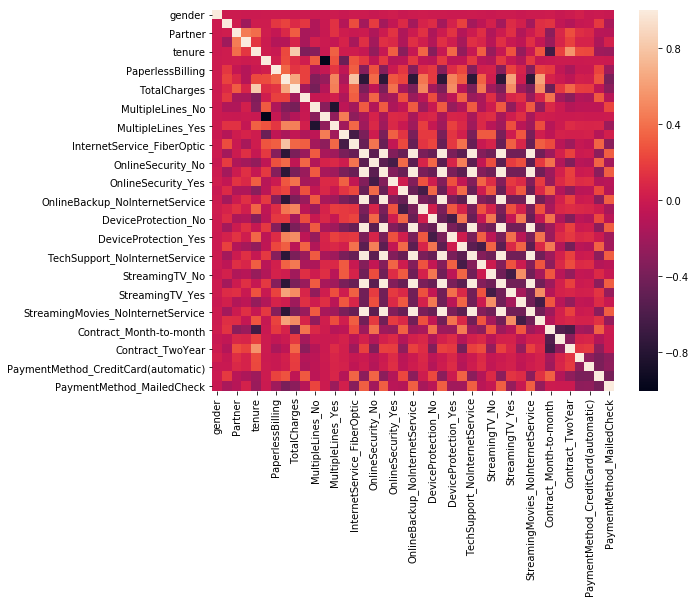

In [34]:
correlations = train.corr()

plt.figure(figsize=(9, 7))
sns.heatmap(correlations)
plt.show()

We create our two final dataset of train and test.

In [35]:
X = train.drop('Churn', 1)
y = train['Churn']
X_test = test.drop('Churn', 1)
y_test = test['Churn']

### Dropping higly correlated features

In [36]:
couples = {}
drop_c = []
for i, r in correlations.iterrows():
    for j, x in r.iteritems():
        if i != j and np.abs(x) > 0.9 and i not in drop_c and j not in drop_c:
            couples[(i, j)] = (correlations.loc[i, j], correlations.loc[i, 'Churn'], correlations.loc[j, 'Churn'])
            drop_c.append(j)

display(pd.DataFrame(couples).T)

0         1         2
PhoneService       MultipleLines_NoPhoneService       -1.0  0.019016 -0.019016
InternetService_No OnlineSecurity_NoInternetService    1.0 -0.231728 -0.231728
                   OnlineBackup_NoInternetService      1.0 -0.231728 -0.231728
                   DeviceProtection_NoInternetService  1.0 -0.231728 -0.231728
                   TechSupport_NoInternetService       1.0 -0.231728 -0.231728
                   StreamingTV_NoInternetService       1.0 -0.231728 -0.231728
                   StreamingMovies_NoInternetService   1.0 -0.231728 -0.231728

# Machine Learning Models 

## Logistic Regression

In [37]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn import metrics
#R 'kernel' to run R chunk
%load_ext rpy2.ipython

# to run this cell use this commands on your console
# --> conda install rpy2 
# --> conda install tzlocal

In [38]:
%%R
data <- read.csv("Tlc.csv")[2:42]
train <- read.csv('train.csv')
test <- read.csv('test.csv')

lr <- glm(Churn~., data = train, family = "binomial")
summary(lr)


Call:
glm(formula = Churn ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9768  -0.6714  -0.2720   0.7081   3.5055  

Coefficients: (17 not defined because of singularities)
                                        Estimate Std. Error z value Pr(>|z|)
(Intercept)                           -2.273e+00  2.994e-01  -7.593 3.13e-14
X                                      2.635e-05  1.859e-05   1.417 0.156368
gender                                -1.623e-02  7.568e-02  -0.215 0.830142
SeniorCitizen                          2.965e-01  9.928e-02   2.987 0.002817
Partner                               -1.045e-01  9.103e-02  -1.148 0.251140
Dependents                            -1.073e-01  1.052e-01  -1.020 0.307757
tenure                                -6.370e-02  7.464e-03  -8.534  < 2e-16
PhoneService                           1.390e+00  9.432e-01   1.474 0.140464
PaperlessBilling                       3.874e-01  8.682e-02   4.462 8

For the final Logistic Regression we will take only the significative variables

In [39]:
%%R
lr <- glm(Churn~tenure+PaperlessBilling+TotalCharges+MultipleLines_No+Contract_Month.to.month+Contract_OneYear+PaymentMethod_ElectronicCheck, data = train, family = "binomial")
print(summary(lr))
#saveRDS(lr, file = "lr.rds") #it could be useful to save the model


Call:
glm(formula = Churn ~ tenure + PaperlessBilling + TotalCharges + 
    MultipleLines_No + Contract_Month.to.month + Contract_OneYear + 
    PaymentMethod_ElectronicCheck, family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6263  -0.7557  -0.2834   0.8140   3.7928  

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   -2.265e+00  2.232e-01 -10.149  < 2e-16 ***
tenure                        -8.951e-02  6.434e-03 -13.912  < 2e-16 ***
PaperlessBilling               6.250e-01  8.221e-02   7.603 2.90e-14 ***
TotalCharges                   7.037e-04  6.335e-05  11.108  < 2e-16 ***
MultipleLines_No              -4.193e-01  8.075e-02  -5.192 2.08e-07 ***
Contract_Month.to.month        2.053e+00  2.004e-01  10.247  < 2e-16 ***
Contract_OneYear               1.038e+00  2.062e-01   5.035 4.78e-07 ***
PaymentMethod_ElectronicCheck  6.293e-01  7.488e-02   8.404  < 2e-16 ***
--

In [40]:
import warnings
warnings.filterwarnings('ignore')

### Roc Auc result for Logistic Regression in R

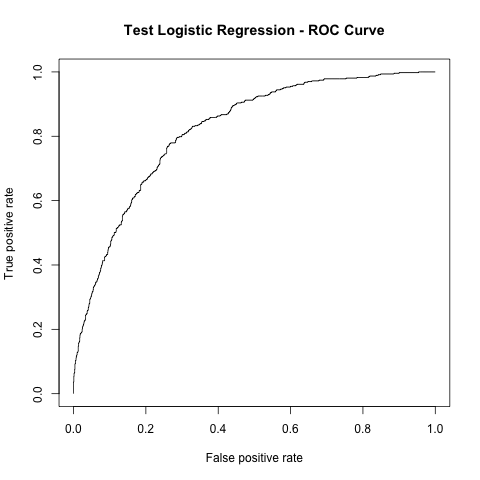

In [45]:
%%R

#to run this cell need to install --> $ conda install -c r r-rocr

install.packages("ROCR")
library(ROCR) 
pred <- predict(lr, newdata = test, type="response")
pred1<-prediction(pred, test$Churn)
perf <-performance(pred1, "tpr", "fpr")
plot(perf,main='Test Logistic Regression - ROC Curve')

# digit 1 in Selection

## Logistic Regression in Python using Pipeline

In [105]:
from sklearn.pipeline import Pipeline

In [106]:
lr_model = Pipeline([('scaler', RobustScaler()), ('model', LogisticRegression())])

In [107]:
lr_model.fit(X.drop(drop_c, 1), y)

lr_probs = [y for (x, y) in lr_model.predict_proba(X.drop(drop_c, 1))]
lr_probs_test = [y for (x, y) in lr_model.predict_proba(X_test.drop(drop_c, 1))]

In [108]:
y2_pred = lr_model.predict(X_test.drop(drop_c, 1))
print('Accuracy of logistic regression classifier on test set:',accuracy_score(y_test,y2_pred))

Accuracy of logistic regression classifier on test set: 0.7876206700738216


In [109]:
print('\n'.join([str((x, c)) for (x, c) in zip(X.drop(drop_c, 1).columns, lr_model.named_steps['model'].coef_[0])]))

('gender', -0.015025951871780793)
('SeniorCitizen', 0.2877511657965188)
('Partner', -0.1118861653834198)
('Dependents', -0.11257234825836794)
('tenure', -2.523048457973051)
('PhoneService', -0.04175100017881046)
('PaperlessBilling', 0.3883908935042987)
('MonthlyCharges', -0.047193095613633385)
('TotalCharges', 0.9073761870514151)
('MultipleLines_No', -0.47132819617308774)
('MultipleLines_Yes', -0.2883361761279115)
('InternetService_Dsl', -0.40330728898987517)
('InternetService_FiberOptic', 0.4505613204643441)
('InternetService_No', -0.7651674035976803)
('OnlineSecurity_No', 0.2519322309085211)
('OnlineSecurity_Yes', -0.20467819943381874)
('OnlineBackup_No', 0.11760956039242845)
('OnlineBackup_Yes', -0.07035552891786342)
('DeviceProtection_No', 0.05402208825724887)
('DeviceProtection_Yes', -0.006768056783360052)
('TechSupport_No', 0.20768956652203732)
('TechSupport_Yes', -0.16043553504725372)
('StreamingTV_No', -0.1129672092508079)
('StreamingTV_Yes', 0.1602212407258222)
('StreamingMovi

### Roc curve for Logistic Regression in python

In [110]:
print(roc_auc_score(y, lr_probs))
print(roc_auc_score(y_test, lr_probs_test))

0.854446795446858
0.8271721898798274


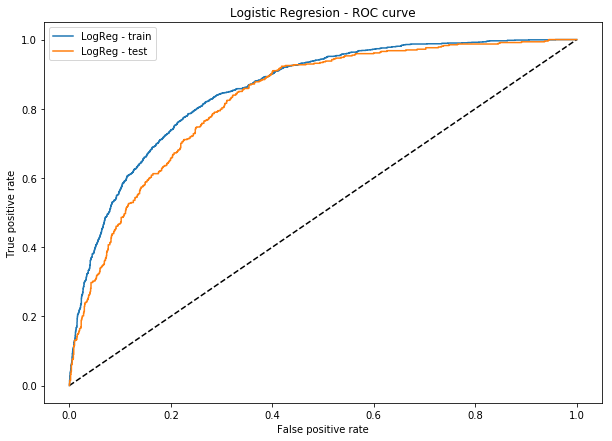

In [111]:
lr_fpr_train, lr_tpr_train, _ = roc_curve(y, lr_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs_test)

plt.figure(1, figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(lr_fpr_train, lr_tpr_train, label='LogReg - train')
plt.plot(lr_fpr, lr_tpr, label='LogReg - test')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regresion - ROC curve')
plt.legend(loc='best')
plt.show()

In [112]:
with open('./lr_model.pkl', 'wb') as f:
    pkl.dump(lr_model, f)

### Logistic Regression models comparison

We want to compare the two models:

* one, in R, with only the significative variables and
* the second, in Python, with all the variables

Depending on the business purpose, the choice between the two model can differ. It specifically depends on the trade off that we want to reach between the two errors 'False Positive' and 'False Negative'.


In [133]:
def pretty_confusion_matrix(y, preds):
    return pd.DataFrame(confusion_matrix(y, preds),
                        columns=pd.MultiIndex(levels=[['prediction'], ['0', '1']], codes=[[0, 0], [0, 1]]),
                        index=pd.MultiIndex(levels=[['target'], ['0', '1']], codes=[[0, 0], [0, 1]]))

In [116]:
pretty_confusion_matrix(y_test, y2_pred)

prediction     
                  0    1
target 0       1144  150
       1        224  243

In [117]:
%%R
final <- rep(0, times = length(pred))
final[pred > 0.2] <- 1

addmargins(table(test$Churn, final))
#rsum(final[test$Churn == 0])

     final
         0    1  Sum
  0    779  515 1294
  1     64  403  467
  Sum  843  918 1761


* In the R result, we have a lower error on the False Negative, so with this model we minimize the FN to 64 on the churn prediction. On the other side, the cost is to have an higher error to the FP.
* In the Python result, there is a low general error (224+150) but we have an higher FN error.

**It's up to the business to choose which model fits better the company's request.**

## Decision Tree
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

**criterion:** 'gini' or 'entropy', to measure the quality of a split<br>
**max_depth:** maximum depth of the tree; if not specified, it create the "maximum" tree<br>
**min_samples_split / min_samples_leaf:** minimum number (or fraction) of records to create a new split / leaf<br>
**random_state:** random seed to start from for the random choices, important for reproducibility

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dt = DecisionTreeClassifier(random_state=1234)

### Hyperparameter tuning

In [49]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [50]:
params = {'criterion': ['gini', 'entropy'], 'max_depth': np.arange(3, 11, 2), 'min_samples_leaf': [0.1, 0.01, 0.001]}
cv_tuning = RandomizedSearchCV(dt, params, random_state=1234, scoring='roc_auc', return_train_score=True, cv=5, n_iter=20)

cv_tuning.fit(X, y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=20, n_jobs=None,
          param_distributions={'criterion': ['gini', 'entropy'], 'max_depth': array([3, 5, 7, 9]), 'min_samples_leaf': [0.1, 0.01, 0.001]},
          pre_dispatch='2*n_jobs', random_state=1234, refit=True,
          return_train_score=True, scoring='roc_auc', verbose=0)

In [51]:
print('\n'.join([str((x, y, z)) for (x, y, z) in zip(cv_tuning.cv_results_['params'], cv_tuning.cv_results_['mean_train_score'], cv_tuning.cv_results_['mean_test_score'])]))

({'min_samples_leaf': 0.01, 'max_depth': 7, 'criterion': 'gini'}, 0.8724132621434764, 0.8288874421649071)
({'min_samples_leaf': 0.01, 'max_depth': 5, 'criterion': 'entropy'}, 0.8590292862287698, 0.834203030473245)
({'min_samples_leaf': 0.001, 'max_depth': 3, 'criterion': 'gini'}, 0.8304027254627705, 0.8200531139468245)
({'min_samples_leaf': 0.1, 'max_depth': 5, 'criterion': 'gini'}, 0.8270862072657132, 0.8231479691049275)
({'min_samples_leaf': 0.01, 'max_depth': 3, 'criterion': 'gini'}, 0.8304027254627705, 0.8200531139468245)
({'min_samples_leaf': 0.1, 'max_depth': 7, 'criterion': 'entropy'}, 0.8269906150561288, 0.8233193513563667)
({'min_samples_leaf': 0.001, 'max_depth': 5, 'criterion': 'gini'}, 0.8612239273799229, 0.8302786632108405)
({'min_samples_leaf': 0.01, 'max_depth': 5, 'criterion': 'gini'}, 0.8602691705226402, 0.8288849046334593)
({'min_samples_leaf': 0.1, 'max_depth': 3, 'criterion': 'gini'}, 0.8270862072657132, 0.8231479691049275)
({'min_samples_leaf': 0.001, 'max_depth': 

In [52]:
params = {'criterion': ['gini', 'entropy'], 'max_depth': [5,6], 'min_samples_leaf': [0.1, 0.01]}
cv_tuning = RandomizedSearchCV(dt, params, random_state=1234, scoring='roc_auc', return_train_score=True, cv=5)

cv_tuning.fit(X, y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'criterion': ['gini', 'entropy'], 'max_depth': [5, 6], 'min_samples_leaf': [0.1, 0.01]},
          pre_dispatch='2*n_jobs', random_state=1234, refit=True,
          return_train_score=True, scoring='roc_auc', verbose=0)

In [53]:
print('\n'.join([str((x, y, z)) for (x, y, z) in zip(cv_tuning.cv_results_['params'], cv_tuning.cv_results_['mean_train_score'], cv_tuning.cv_results_['mean_test_score'])]))

({'min_samples_leaf': 0.1, 'max_depth': 5, 'criterion': 'gini'}, 0.8270862072657132, 0.8231479691049275)
({'min_samples_leaf': 0.01, 'max_depth': 5, 'criterion': 'gini'}, 0.8602691705226402, 0.8288849046334593)
({'min_samples_leaf': 0.1, 'max_depth': 6, 'criterion': 'gini'}, 0.8270862072657132, 0.8231479691049275)
({'min_samples_leaf': 0.01, 'max_depth': 6, 'criterion': 'gini'}, 0.8681728808440591, 0.8322103054124061)
({'min_samples_leaf': 0.1, 'max_depth': 5, 'criterion': 'entropy'}, 0.8269906150561288, 0.8233193513563667)
({'min_samples_leaf': 0.01, 'max_depth': 5, 'criterion': 'entropy'}, 0.8590292862287698, 0.834203030473245)
({'min_samples_leaf': 0.1, 'max_depth': 6, 'criterion': 'entropy'}, 0.8269906150561288, 0.8233193513563667)
({'min_samples_leaf': 0.01, 'max_depth': 6, 'criterion': 'entropy'}, 0.8670357080057121, 0.8348593125518344)


The parameters that in our opinion are not so efficient are "Gini Criterion" and "0.1 min sample leaf"
The best hyperparameters are min_samples_leaf= 0.01, max_depth = 6, criterion = "entropy"

In [54]:
dectree = DecisionTreeClassifier(random_state=1234, criterion= "entropy", max_depth=6, min_samples_leaf= 0.01)
dectree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.01, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best')

### Roc Auc results

In [55]:
dectree_probs = [y for (x, y) in dectree.predict_proba(X)]
dectree_probs_test = [y for (x, y) in dectree.predict_proba(X_test)]

print(roc_auc_score(y, dectree_probs))
print(roc_auc_score(y_test, dectree_probs_test))

0.8631772357604011
0.8236797076938861


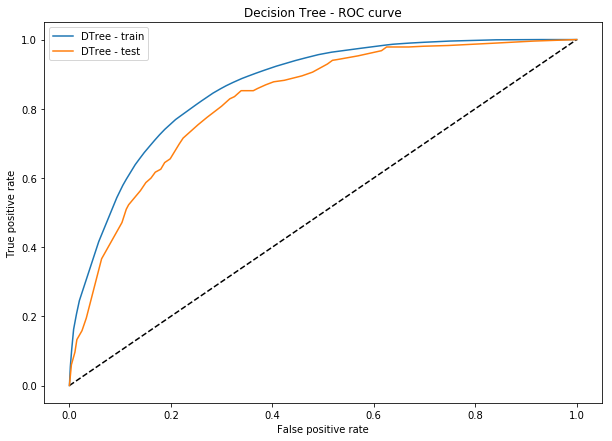

In [56]:
dt_fpr_train, dt_tpr_train, _ = roc_curve(y, dectree_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dectree_probs_test)

plt.figure(1, figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(dt_fpr_train, dt_tpr_train, label='DTree - train')
plt.plot(dt_fpr, dt_tpr, label='DTree - test')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree - ROC curve')
plt.legend(loc='best')
plt.show()

In [57]:
with open('./dectree.pkl', 'wb') as f:
    pkl.dump(dectree, f)

## Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1234, n_estimators=50)

### Hyperparameter tuning

In [59]:
params = {'criterion': ['gini', 'entropy'], 'max_depth': np.arange(2, 6), 'min_samples_leaf': np.logspace(-1, -3, 3)}
cv_tuning = RandomizedSearchCV(rf, params, random_state=1234, scoring='roc_auc', return_train_score=True, cv=5, n_iter=20)

cv_tuning.fit(X, y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=20, n_jobs=None,
          param_distributions={'criterion': ['gini', 'entropy'], 'max_depth': array([2, 3, 4, 5]), 'min_samples_leaf': array([0.1  , 0.01 , 0.001])},
          pre_dispatch='2*n_jobs', random_state=1234, refit=True,
          return_train_score=True, scoring='roc_auc', verbose=0)

In [60]:
print('\n'.join([str((x, y, z)) for (x, y, z) in zip(cv_tuning.cv_results_['params'], cv_tuning.cv_results_['mean_train_score'], cv_tuning.cv_results_['mean_test_score'])]))

({'min_samples_leaf': 0.01, 'max_depth': 4, 'criterion': 'gini'}, 0.8547990294826073, 0.8451213910139885)
({'min_samples_leaf': 0.01, 'max_depth': 3, 'criterion': 'entropy'}, 0.8472224236432992, 0.840060022101025)
({'min_samples_leaf': 0.001, 'max_depth': 2, 'criterion': 'gini'}, 0.8402673938898705, 0.8348335432605015)
({'min_samples_leaf': 0.1, 'max_depth': 3, 'criterion': 'gini'}, 0.8408425973897231, 0.8357863652584202)
({'min_samples_leaf': 0.01, 'max_depth': 2, 'criterion': 'gini'}, 0.8401999415819281, 0.8347176499030435)
({'min_samples_leaf': 0.1, 'max_depth': 4, 'criterion': 'entropy'}, 0.839537602202272, 0.8333120089742818)
({'min_samples_leaf': 0.001, 'max_depth': 3, 'criterion': 'gini'}, 0.8483790575434533, 0.8417791773062331)
({'min_samples_leaf': 0.01, 'max_depth': 3, 'criterion': 'gini'}, 0.8481291960421945, 0.8416361547650354)
({'min_samples_leaf': 0.1, 'max_depth': 2, 'criterion': 'gini'}, 0.8399003632097672, 0.8346157905880914)
({'min_samples_leaf': 0.001, 'max_depth': 4

In [61]:
rf = RandomForestClassifier(random_state=1234, n_estimators=50, criterion='gini')

params = {'max_depth': [3,4], 'min_samples_leaf': [0.01, 0.001], 'max_features': ['sqrt', 0.2, 0.5]}
cv_tuning = RandomizedSearchCV(rf, params, random_state=1234, scoring='roc_auc', return_train_score=True, cv=5)

cv_tuning.fit(X, y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'max_depth': [3, 4], 'min_samples_leaf': [0.01, 0.001], 'max_features': ['sqrt', 0.2, 0.5]},
          pre_dispatch='2*n_jobs', random_state=1234, refit=True,
          return_train_score=True, scoring='roc_auc', verbose=0)

In [62]:
print('\n'.join([str((x, y, z)) for (x, y, z) in zip(cv_tuning.cv_results_['params'], cv_tuning.cv_results_['mean_train_score'], cv_tuning.cv_results_['mean_test_score'])]))

({'min_samples_leaf': 0.001, 'max_features': 'sqrt', 'max_depth': 4}, 0.8565694928299008, 0.845380632956895)
({'min_samples_leaf': 0.01, 'max_features': 0.2, 'max_depth': 4}, 0.8550233797079633, 0.8463509247349731)
({'min_samples_leaf': 0.001, 'max_features': 0.5, 'max_depth': 4}, 0.8604753133959981, 0.847428403805584)
({'min_samples_leaf': 0.01, 'max_features': 0.2, 'max_depth': 3}, 0.8496069800584845, 0.8429907712506793)
({'min_samples_leaf': 0.001, 'max_features': 0.2, 'max_depth': 4}, 0.8567076179375108, 0.8466694753637695)
({'min_samples_leaf': 0.01, 'max_features': 0.5, 'max_depth': 4}, 0.8587658657532147, 0.8478527726312942)
({'min_samples_leaf': 0.001, 'max_features': 'sqrt', 'max_depth': 3}, 0.8483790575434533, 0.8417791773062331)
({'min_samples_leaf': 0.01, 'max_features': 'sqrt', 'max_depth': 3}, 0.8481291960421945, 0.8416361547650354)
({'min_samples_leaf': 0.01, 'max_features': 0.5, 'max_depth': 3}, 0.8500887086905973, 0.8433806511137657)
({'min_samples_leaf': 0.001, 'max_f

In [63]:
rf = RandomForestClassifier(random_state=1234, n_estimators=50, criterion='gini', max_depth=3)

params = {'min_samples_leaf': [0.01, 0.001], 'max_features': [0.2, 0.3, 0.4, 0.5]}
cv_tuning = GridSearchCV(rf, params, scoring='roc_auc', return_train_score=True, cv=5)

cv_tuning.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': [0.01, 0.001], 'max_features': [0.2, 0.3, 0.4, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [64]:
print('\n'.join([str((x, y, z)) for (x, y, z) in zip(cv_tuning.cv_results_['params'], cv_tuning.cv_results_['mean_train_score'], cv_tuning.cv_results_['mean_test_score'])]))

({'max_features': 0.2, 'min_samples_leaf': 0.01}, 0.8496069800584845, 0.8429907712506793)
({'max_features': 0.2, 'min_samples_leaf': 0.001}, 0.8497057281609275, 0.8430674077987341)
({'max_features': 0.3, 'min_samples_leaf': 0.01}, 0.8500517212031509, 0.8436002979113963)
({'max_features': 0.3, 'min_samples_leaf': 0.001}, 0.8503288077713455, 0.8436251075384161)
({'max_features': 0.4, 'min_samples_leaf': 0.01}, 0.8512994151977796, 0.8449006118243753)
({'max_features': 0.4, 'min_samples_leaf': 0.001}, 0.8513753398443417, 0.8445454920961833)
({'max_features': 0.5, 'min_samples_leaf': 0.01}, 0.8500887086905973, 0.8433806511137657)
({'max_features': 0.5, 'min_samples_leaf': 0.001}, 0.8502339232292846, 0.8433243090001683)


In [65]:
rf = RandomForestClassifier(random_state=1234, n_estimators=50, criterion='gini', max_depth=4, min_samples_leaf=0.01, max_features=0.2, warm_start=True)

for i in range(5):
    rf.fit(X, y)
    probs = [y for (x, y) in rf.predict_proba(X)]
    probs_test = [y for (x, y) in rf.predict_proba(X_test)]
    print(rf.n_estimators, roc_auc_score(y, probs), roc_auc_score(y_test, probs_test))
    rf.n_estimators += 50

50 0.8539377656367193 0.8248496602669545
100 0.8548418496404252 0.8248860661461729
150 0.854682008029766 0.8254172610202251
200 0.8548863368972162 0.825278256754118
250 0.8548435960410019 0.8253601699823598


In [66]:
rf = RandomForestClassifier(random_state=1234, n_estimators=150, criterion='gini', max_depth=5, min_samples_leaf=0.001, max_features=0.4, warm_start=True)
for i in range(5):
    rf.fit(X, y)
    probs = [y for (x, y) in rf.predict_proba(X)]
    probs_test = [y for (x, y) in rf.predict_proba(X_test)]
    print(rf.n_estimators, roc_auc_score(y, probs), roc_auc_score(y_test, probs_test))
    rf.n_estimators += 50
rf.fit(X, y)

150 0.8686985271409033 0.829019788250168
200 0.8689171029604248 0.8290346815643937
250 0.8689858559936469 0.8292572538714343
300 0.8690219789108342 0.8290652955991911
350 0.8690323653984734 0.8289941386534458


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=0.4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.001, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=False, random_state=1234, verbose=0, warm_start=True)

### Roc Auc results

In [67]:
rf_probs = [y for (x, y) in rf.predict_proba(X)]
rf_probs_test = [y for (x, y) in rf.predict_proba(X_test)]

print(roc_auc_score(y, rf_probs))
print(roc_auc_score(y_test, rf_probs_test))

0.8689262026265865
0.8290454378468901


In [68]:
feats = [(x, y) for x, y in zip(X.columns, rf.feature_importances_) if y > 0]
sorted(feats, reverse=True, key=lambda x: x[1])

[('Contract_Month-to-month', 0.29171094174899204),
 ('tenure', 0.14773937847694213),
 ('OnlineSecurity_No', 0.1055682674428867),
 ('InternetService_FiberOptic', 0.09417843821192362),
 ('TotalCharges', 0.0846220528777234),
 ('TechSupport_No', 0.07397192558750652),
 ('MonthlyCharges', 0.06400055641087965),
 ('InternetService_Dsl', 0.023937467530190822),
 ('Contract_TwoYear', 0.01945689124386136),
 ('PaymentMethod_ElectronicCheck', 0.01758061255991091),
 ('Contract_OneYear', 0.01266855398251848),
 ('OnlineBackup_No', 0.008477610936012884),
 ('OnlineSecurity_Yes', 0.00596587620413353),
 ('PaperlessBilling', 0.0042101918584061),
 ('TechSupport_Yes', 0.003566146283856724),
 ('OnlineBackup_NoInternetService', 0.003428875220757967),
 ('StreamingMovies_Yes', 0.0030165941800082375),
 ('StreamingTV_Yes', 0.0029449880979381757),
 ('StreamingTV_No', 0.0027652362003834892),
 ('OnlineSecurity_NoInternetService', 0.0025231154581500897),
 ('SeniorCitizen', 0.002307268254959532),
 ('TechSupport_NoIntern

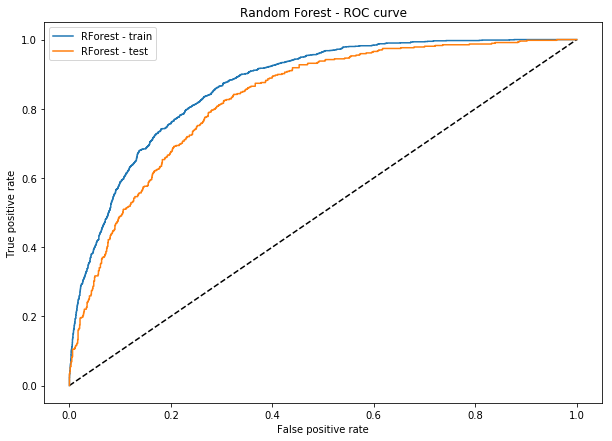

In [69]:
rf_fpr_train, rf_tpr_train, _ = roc_curve(y, rf_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs_test)

plt.figure(1, figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(rf_fpr_train, rf_tpr_train, label='RForest - train')
plt.plot(rf_fpr, rf_tpr, label='RForest - test')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest - ROC curve')
plt.legend(loc='best')
plt.show()

In [70]:
with open('./rf_model.pkl', 'wb') as f:
    pkl.dump(rf, f)

## Gradient Boosting
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

- Same for the tree specific hyperparameters
- **n_estimators, max_features**
- **learning_rate:** shrinking rate of each tree's contribution. You can do a trade-off between this and # of estimators
- **subsample:** percentage of records to use for each estimator's train phase; this is chosen by random subsampling

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=1234, n_estimators=50)

In [72]:

# This is a useful function to print the results

def print_cv(cv):
  print('\n'.join([str((x, y, z)) for (x, y, z) in zip(cv.cv_results_['params'], cv.cv_results_['mean_train_score'], cv.cv_results_['mean_test_score'])]))

### Hyperparameter tuning

In [73]:
params = {'learning_rate': np.logspace(-1, -4, 4)}
cv_tuning = GridSearchCV(gb, params, scoring='roc_auc', return_train_score=True, cv=5)

cv_tuning.fit(X, y)

print_cv(cv_tuning)

({'learning_rate': 0.1}, 0.8784514724275356, 0.8525541811994151)
({'learning_rate': 0.01}, 0.8486957829445778, 0.8396457754689854)
({'learning_rate': 0.001}, 0.832106124479535, 0.8222785340250309)
({'learning_rate': 0.0001}, 0.8305456161071694, 0.8201035883553869)


In [74]:
gb = GradientBoostingClassifier(random_state=1234, n_estimators=50, learning_rate=0.01, max_depth=2)

params = {'min_samples_leaf': np.logspace(-1, -2, 4), 'max_features': ['sqrt', 0.2, 0.3, 0.5, 0.7, 0.8]}
cv_tuning = RandomizedSearchCV(gb, params, random_state=1234, scoring='roc_auc', return_train_score=True, cv=5, n_iter=20)

cv_tuning.fit(X, y)

print_cv(cv_tuning)


({'min_samples_leaf': 0.01, 'max_features': 0.2}, 0.8460657877964701, 0.8410898003655919)
({'min_samples_leaf': 0.1, 'max_features': 0.7}, 0.8386449663509676, 0.8339992859577564)
({'min_samples_leaf': 0.021544346900318846, 'max_features': 'sqrt'}, 0.846196630982724, 0.8411342018077236)
({'min_samples_leaf': 0.01, 'max_features': 'sqrt'}, 0.846227525480457, 0.8411346606659833)
({'min_samples_leaf': 0.046415888336127795, 'max_features': 'sqrt'}, 0.8457313121789453, 0.8406783760312327)
({'min_samples_leaf': 0.021544346900318846, 'max_features': 0.7}, 0.8390925967452713, 0.8344076354394442)
({'min_samples_leaf': 0.046415888336127795, 'max_features': 0.2}, 0.8458441815117219, 0.8406381050452297)
({'min_samples_leaf': 0.1, 'max_features': 0.2}, 0.8468005136643704, 0.8421636165206091)
({'min_samples_leaf': 0.1, 'max_features': 'sqrt'}, 0.8453764081046866, 0.8405718489389283)
({'min_samples_leaf': 0.1, 'max_features': 0.3}, 0.8462977203202294, 0.8406424556218487)
({'min_samples_leaf': 0.046415

In [75]:
params = {'min_samples_leaf': [0.1, 0.01], 'max_features': ['sqrt', 0.2, 0.3, 0.4], 'subsample': [0.4, 0.8, 1]}
cv_tuning = RandomizedSearchCV(gb, params, scoring='roc_auc', return_train_score=True, cv=5, random_state=1234, n_iter=20)

cv_tuning.fit(X, y)

print_cv(cv_tuning)

({'subsample': 0.8, 'min_samples_leaf': 0.1, 'max_features': 0.2}, 0.8427806172625516, 0.8389017964295781)
({'subsample': 0.8, 'min_samples_leaf': 0.01, 'max_features': 0.3}, 0.8454486183420176, 0.8414114559249425)
({'subsample': 1, 'min_samples_leaf': 0.1, 'max_features': 'sqrt'}, 0.8453764081046866, 0.8405718489389283)
({'subsample': 0.4, 'min_samples_leaf': 0.01, 'max_features': 'sqrt'}, 0.844787671372751, 0.8410623117108403)
({'subsample': 0.8, 'min_samples_leaf': 0.1, 'max_features': 'sqrt'}, 0.841874081000434, 0.8375454607417578)
({'subsample': 0.4, 'min_samples_leaf': 0.1, 'max_features': 0.4}, 0.8417438805754672, 0.8391211233101635)
({'subsample': 1, 'min_samples_leaf': 0.01, 'max_features': 'sqrt'}, 0.846227525480457, 0.8411346606659833)
({'subsample': 0.8, 'min_samples_leaf': 0.01, 'max_features': 'sqrt'}, 0.8432179776665005, 0.8391444352570646)
({'subsample': 0.4, 'min_samples_leaf': 0.1, 'max_features': 'sqrt'}, 0.8398733591928795, 0.8362186425332125)
({'subsample': 1, 'min

In [76]:
gb = GradientBoostingClassifier(random_state=1234, max_depth=2, subsample=0.8, min_samples_leaf=0.01, max_features=0.3)

params = [{'learning_rate': [0.01], 'n_estimators': [50, 100, 150]}, {'learning_rate': [0.01], 'n_estimators': [100, 200, 250]}]
cv_tuning = GridSearchCV(gb, params, scoring='roc_auc', return_train_score=True, cv=5)

cv_tuning.fit(X, y)

print_cv(cv_tuning)

({'learning_rate': 0.01, 'n_estimators': 50}, 0.8454486183420176, 0.8414114559249425)
({'learning_rate': 0.01, 'n_estimators': 100}, 0.8486656609181482, 0.8437116065560719)
({'learning_rate': 0.01, 'n_estimators': 150}, 0.8507552073715223, 0.8448197622765585)
({'learning_rate': 0.01, 'n_estimators': 100}, 0.8486656609181482, 0.8437116065560719)
({'learning_rate': 0.01, 'n_estimators': 200}, 0.8528890950813682, 0.8458970404765241)
({'learning_rate': 0.01, 'n_estimators': 250}, 0.8547564598026731, 0.8472409208696043)


In [77]:
gb = GradientBoostingClassifier(random_state=1234, max_depth=2, subsample=0.8, min_samples_leaf=0.01, max_features=0.3, learning_rate=0.01, n_estimators=150)

gb.fit(X, y)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=2,
              max_features=0.3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=0.01, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=150,
              n_iter_no_change=None, presort='auto', random_state=1234,
              subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

### ROC-AUC Results

In [78]:
gb_probs = [y for (x, y) in gb.predict_proba(X)]
gb_probs_test = [y for (x, y) in gb.predict_proba(X_test)]

print(roc_auc_score(y, gb_probs))
print(roc_auc_score(y_test, gb_probs_test))

0.8494050288983337
0.8220670927257743


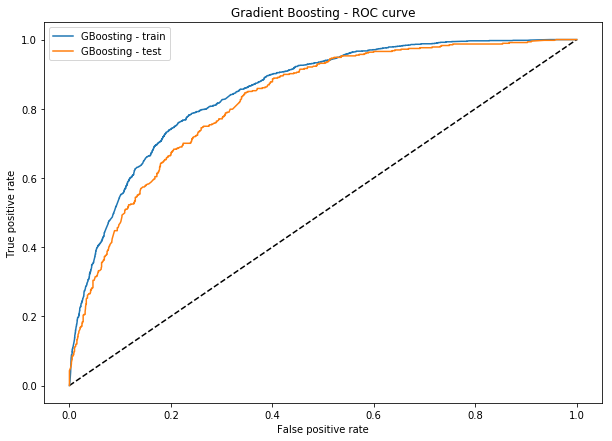

In [79]:
gb_fpr_train, gb_tpr_train, _ = roc_curve(y, gb_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs_test)

plt.figure(1, figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(gb_fpr_train, gb_tpr_train, label='GBoosting - train')
plt.plot(gb_fpr, gb_tpr, label='GBoosting - test')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Gradient Boosting - ROC curve')
plt.legend(loc='best')
plt.show()

In [80]:
with open('./gb_model.pkl', 'wb') as f:
  pkl.dump(gb, f)

## Neural Network
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

- **activation:** activation function for the layers. Choose between 'identity', ‘logistic’, ‘tanh’ and ‘relu’
- **learning_rate_init:** initial shrinking parameter of the learning. It is updated during the training
- **hidden_layer_sizes:** architecture of the hidden layers, as Python tuple: for example, for only one layer with 10 neurons, put (10,)
- **batch_size:** number of records taken for every minibatch iteration. Usually powers of 2 are good candidates (16, 32, 64, 128).
- **alpha:** L2 regularization parameter
- **max_iter:** maximum number of epochs

In [81]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(random_state=1234, max_iter=50)

In [82]:
import warnings

warnings.filterwarnings('ignore')

### Hyperparameter tuning

In [83]:
params = {'activation': ['tanh', 'relu',"logistic"], 'learning_rate_init': np.logspace(-1, -4, 4), 
          'batch_size': [16, 32, 64, 128]}
cv_tuning = RandomizedSearchCV(nn, params, random_state=1234, scoring='roc_auc', 
                               return_train_score=True, cv=5, n_iter=20)

cv_tuning.fit(X, y)

print_cv(cv_tuning)

({'learning_rate_init': 0.1, 'batch_size': 64, 'activation': 'tanh'}, 0.5258067622108189, 0.5243001413822733)
({'learning_rate_init': 0.001, 'batch_size': 128, 'activation': 'logistic'}, 0.832577960161468, 0.8286105461047295)
({'learning_rate_init': 0.001, 'batch_size': 128, 'activation': 'tanh'}, 0.8216582000553692, 0.8162389761842682)
({'learning_rate_init': 0.01, 'batch_size': 64, 'activation': 'logistic'}, 0.7409695576769175, 0.7400381255262711)
({'learning_rate_init': 0.01, 'batch_size': 128, 'activation': 'relu'}, 0.8032209553156656, 0.800870184298255)
({'learning_rate_init': 0.0001, 'batch_size': 64, 'activation': 'logistic'}, 0.8391374368371644, 0.8363710329643894)
({'learning_rate_init': 0.1, 'batch_size': 32, 'activation': 'tanh'}, 0.5795712637138323, 0.5717184753483081)
({'learning_rate_init': 0.0001, 'batch_size': 128, 'activation': 'relu'}, 0.836444784451009, 0.8344218525415271)
({'learning_rate_init': 0.01, 'batch_size': 128, 'activation': 'tanh'}, 0.7189160603522551, 0.7

In [84]:
nn = MLPClassifier(random_state=1234, activation='logistic', max_iter=50, learning_rate_init=0.001)
params = {'batch_size': [64,128,256], 'hidden_layer_sizes': np.arange(20, 101, 20)}
cv_tuning = RandomizedSearchCV(nn, params, random_state=1234, scoring='roc_auc', return_train_score=True, cv=5, n_iter=10)

cv_tuning.fit(X, y)

print_cv(cv_tuning)

({'hidden_layer_sizes': 80, 'batch_size': 256}, 0.8500201525668067, 0.8421266735128178)
({'hidden_layer_sizes': 40, 'batch_size': 256}, 0.8464991975263395, 0.8421967664654975)
({'hidden_layer_sizes': 20, 'batch_size': 64}, 0.8335016953211871, 0.8295883387362655)
({'hidden_layer_sizes': 60, 'batch_size': 256}, 0.846704715414625, 0.8403263542257585)
({'hidden_layer_sizes': 100, 'batch_size': 256}, 0.8484657385160899, 0.8428609728941363)
({'hidden_layer_sizes': 60, 'batch_size': 64}, 0.8397313612781823, 0.83352417516056)
({'hidden_layer_sizes': 20, 'batch_size': 256}, 0.8480068912278194, 0.8437162023573602)
({'hidden_layer_sizes': 60, 'batch_size': 128}, 0.830957756749769, 0.828264985760304)
({'hidden_layer_sizes': 40, 'batch_size': 64}, 0.8391907850506343, 0.8336354911851694)
({'hidden_layer_sizes': 100, 'batch_size': 128}, 0.832577960161468, 0.8286105461047295)


In [85]:
params = {'batch_size': [128,256], 'hidden_layer_sizes': [20, 40, 80]}
cv_tuning = GridSearchCV(nn, params, scoring='roc_auc', return_train_score=True, cv=5)

cv_tuning.fit(X, y)

print_cv(cv_tuning)

({'batch_size': 128, 'hidden_layer_sizes': 20}, 0.8288451453247667, 0.8236987094798675)
({'batch_size': 128, 'hidden_layer_sizes': 40}, 0.8355577745411475, 0.8319233719595829)
({'batch_size': 128, 'hidden_layer_sizes': 80}, 0.8390468941227501, 0.8330664294228769)
({'batch_size': 256, 'hidden_layer_sizes': 20}, 0.8480068912278194, 0.8437162023573602)
({'batch_size': 256, 'hidden_layer_sizes': 40}, 0.8464991975263395, 0.8421967664654975)
({'batch_size': 256, 'hidden_layer_sizes': 80}, 0.8500201525668067, 0.8421266735128178)


In [86]:
nn = MLPClassifier(random_state=1234, activation='logistic', max_iter=500, 
                   learning_rate_init=0.001, batch_size=256, hidden_layer_sizes=(20,), 
                   verbose=True, n_iter_no_change=100, tol=1e-5)

nn.fit(X, y)

Iteration 1, loss = 0.56189443
Iteration 2, loss = 0.53999592
Iteration 3, loss = 0.52867228
Iteration 4, loss = 0.51375276
Iteration 5, loss = 0.49609333
Iteration 6, loss = 0.48356084
Iteration 7, loss = 0.47779682
Iteration 8, loss = 0.46741384
Iteration 9, loss = 0.46076107
Iteration 10, loss = 0.45999209
Iteration 11, loss = 0.46099224
Iteration 12, loss = 0.45234858
Iteration 13, loss = 0.45632194
Iteration 14, loss = 0.44699536
Iteration 15, loss = 0.45067096
Iteration 16, loss = 0.44067146
Iteration 17, loss = 0.44568228
Iteration 18, loss = 0.44282242
Iteration 19, loss = 0.43732016
Iteration 20, loss = 0.43465485
Iteration 21, loss = 0.43708805
Iteration 22, loss = 0.43546404
Iteration 23, loss = 0.42850292
Iteration 24, loss = 0.43416771
Iteration 25, loss = 0.42964894
Iteration 26, loss = 0.42693587
Iteration 27, loss = 0.42985928
Iteration 28, loss = 0.42374976
Iteration 29, loss = 0.42128969
Iteration 30, loss = 0.42416438
Iteration 31, loss = 0.42867245
Iteration 32, los

Iteration 262, loss = 0.39974339
Iteration 263, loss = 0.40432536
Iteration 264, loss = 0.39978267
Iteration 265, loss = 0.39851163
Iteration 266, loss = 0.40041382
Iteration 267, loss = 0.39798397
Iteration 268, loss = 0.39950470
Iteration 269, loss = 0.40627136
Iteration 270, loss = 0.40548225
Iteration 271, loss = 0.40078479
Iteration 272, loss = 0.39746967
Iteration 273, loss = 0.40264212
Iteration 274, loss = 0.40633636
Iteration 275, loss = 0.40313207
Iteration 276, loss = 0.39909259
Iteration 277, loss = 0.40048739
Iteration 278, loss = 0.39939033
Iteration 279, loss = 0.40053887
Iteration 280, loss = 0.39839168
Iteration 281, loss = 0.40145103
Iteration 282, loss = 0.40043088
Iteration 283, loss = 0.40537281
Iteration 284, loss = 0.40146641
Iteration 285, loss = 0.40086927
Iteration 286, loss = 0.39628666
Iteration 287, loss = 0.40026229
Iteration 288, loss = 0.40176934
Iteration 289, loss = 0.40039256
Iteration 290, loss = 0.40270017
Iteration 291, loss = 0.39923271
Iteration 

MLPClassifier(activation='logistic', alpha=0.0001, batch_size=256, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=100, nesterovs_momentum=True, power_t=0.5,
       random_state=1234, shuffle=True, solver='adam', tol=1e-05,
       validation_fraction=0.1, verbose=True, warm_start=False)

### ROC-AUC Results

In [87]:
nn_probs = [y for (x, y) in nn.predict_proba(X)]
nn_probs_test = [y for (x, y) in nn.predict_proba(X_test)]

print(roc_auc_score(y, nn_probs))
print(roc_auc_score(y_test, nn_probs_test))

0.8640661536538377
0.8291149399799436


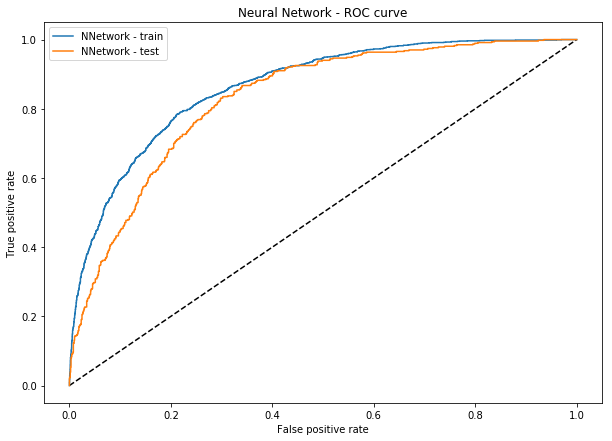

In [88]:
nn_fpr_train, nn_tpr_train, _ = roc_curve(y, nn_probs)
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_probs_test)

plt.figure(1, figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(nn_fpr_train, nn_tpr_train, label='NNetwork - train')
plt.plot(nn_fpr, nn_tpr, label='NNetwork - test')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Neural Network - ROC curve')
plt.legend(loc='best')
plt.show()

In [89]:
with open('./nn_model.pkl', 'wb') as f:
    pkl.dump(nn, f)
    # save the model in the file

## Neural Network with Keras

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
from sklearn.model_selection import StratifiedShuffleSplit 
from sklearn.model_selection import RandomizedSearchCV

from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import advanced_activations
from keras.optimizers import Adam
import keras


# data cleaning to be removed

tlc_db = pd.read_csv("TelcoChurn.csv")
tlc_db.head()
tlc_db['TotalCharges'] = tlc_db["TotalCharges"].replace(" ",0)
tlc_db["TotalCharges"] = tlc_db["TotalCharges"].astype(float)
tlc_db[['Partner','Dependents','PhoneService','PaperlessBilling','Churn']] = tlc_db[['Partner','Dependents','PhoneService','PaperlessBilling','Churn']].replace({'No': 0, 'Yes': 1})
tlc_db['gender'] = tlc_db['gender'].replace({'Male': 0, 'Female': 1})
tlc_db1 = tlc_db.copy()
columns1 = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
for colnames in columns1:
    mlt = pd.get_dummies(tlc_db1[colnames])
    list1 = list(mlt.columns.values)
    listaname = []
    for i in list1:
        string = "" 
        for y in i.split():
            string += y.capitalize()
        listaname.append(colnames+'_'+string)
    mlt.set_axis(listaname, axis='columns', inplace=True)
    tlc_db1.drop(colnames, axis = 1, inplace=True)
    tlc_db1 = pd.concat([tlc_db1, mlt], axis = 1)
tlc_db1.drop('customerID',1,inplace=True)


sss = StratifiedShuffleSplit(test_size=0.25, n_splits=1, random_state=1234)
for train_index, test_index in sss.split(tlc_db1, tlc_db1['Churn']):
    print(len(train_index), len(test_index))
    print(tlc_db1.loc[train_index, 'Churn'].mean(), tlc_db1.loc[test_index, 'Churn'].mean())
    train = tlc_db1.loc[train_index]
    test = tlc_db1.loc[test_index]

Y = tlc_db1["Churn"]
X = tlc_db1.drop(columns=['Churn'])

x_train = train.drop(columns=['Churn'])
y_train = train["Churn"]
x_test = test.drop(columns=['Churn'])
y_test = test["Churn"]

Using TensorFlow backend.


5282 1761
0.2654297614539947 0.26519023282226006


In [87]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_NoPhoneService,MultipleLines_Yes,InternetService_Dsl,InternetService_FiberOptic,InternetService_No,OnlineSecurity_No,OnlineSecurity_NoInternetService,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_NoInternetService,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_NoInternetService,DeviceProtection_Yes,TechSupport_No,TechSupport_NoInternetService,TechSupport_Yes,StreamingTV_No,StreamingTV_NoInternetService,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_NoInternetService,StreamingMovies_Yes,Contract_Month-to-month,Contract_OneYear,Contract_TwoYear,PaymentMethod_BankTransfer(automatic),PaymentMethod_CreditCard(automatic),PaymentMethod_ElectronicCheck,PaymentMethod_MailedCheck
0,1,0,1,0,1,0,1,29.85,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,56.95,1889.50,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,1,53.85,108.15,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,42.30,1840.75,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,1,70.70,151.65,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
5,1,0,0,0,8,1,1,99.65,820.50,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0
6,0,0,0,1,22,1,1,89.10,1949.40,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0
7,1,0,0,0,10,0,0,29.75,301.90,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
8,1,0,1,0,28,1,1,104.80,3046.05,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0
9,0,0,0,1,62,1,0,56.15,3487.95,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0


In [89]:
Y

0       0
1       0
2       1
3       0
4       1
5       1
6       0
7       0
8       1
9       0
10      0
11      0
12      0
13      1
14      0
15      0
16      0
17      0
18      1
19      0
20      1
21      0
22      1
23      0
24      0
25      0
26      1
27      1
28      0
29      1
       ..
7013    0
7014    0
7015    0
7016    0
7017    0
7018    1
7019    0
7020    0
7021    1
7022    0
7023    0
7024    0
7025    0
7026    1
7027    0
7028    0
7029    0
7030    0
7031    0
7032    1
7033    0
7034    1
7035    0
7036    0
7037    0
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

### Model definition

In [88]:
def create_model(n_hidden_1 = 30, n_hidden_2 = 10, activation_fun = 'relu', lr = 0.01):
    print("lr " + str(lr) + "| n_hidden_1 " + str(n_hidden_1) + "| n_hidden_2 " + str(n_hidden_2) + " | activation_fun " + str(activation_fun)) 
    model = Sequential()
    model.add(Dense(num_input, input_dim=num_input,activation=activation_fun))
    model.add(Dense(n_hidden_1,activation=activation_fun))
    model.add(Dense(10,activation=activation_fun))
    model.add(Dense(1,activation=activation_fun))
    model.add(Dense(num_classes,activation='sigmoid'))
    adam = Adam(lr=lr)
    model.compile(loss='binary_crossentropy', optimizer=adam,metrics=metrics)
    return model

model = KerasRegressor(build_fn=create_model, batch_size=128, epochs=10, verbose=1)

### Hyperparameters optimization by RandomizedSearchCV

In [ ]:
# Parameters
metrics = ['accuracy']
batch_size = 128
lr = [0.001, 0.003, 0.005, 0.007, 0.01]
epochs = [10, 20, 30, 40]
num_input = x_train.shape[1]
n_hidden_1 = [5, 10, 20, 50, 100] 
n_hidden_2 = [5, 10, 30, 40]
num_classes = 1
param_dist = dict(n_hidden_1=n_hidden_1, n_hidden_2=n_hidden_2, epochs=epochs, lr=lr)
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, n_jobs=1, cv=5)
random_search.fit(X, Y)

# Show the results
print("Best: %f using %s" % (random_search.best_score_, random_search.best_params_))
means = random_search.cv_results_['mean_test_score']
stds = random_search.cv_results_['std_test_score']
params = random_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

lr 0.003| n_hidden_1 20| n_hidden_2 10 | activation_fun relu
Epoch 1/40


### Best hyperparameters

Best parameters found by random search are {'n_hidden_2': 30, 'n_hidden_1': 20, 'lr': 0.005, 'epochs': 20}

In [ ]:
model = create_model(n_hidden_1=20, n_hidden_2=30, lr= 0.005)
model.fit(x_train, y_train, batch_size=128, epochs=20)
score = model.evaluate(x_test, y_test, batch_size=128)

## Support vector machines

In [118]:
from sklearn import svm
svm = svm.SVC(probability=True)

In [ ]:
params = {'kernel': ['sigmoid', 'rbf'], 'coef0': np.logspace(-1, -4, 4)}
cv_tuning = GridSearchCV(svm, params, scoring='roc_auc', 
                               return_train_score=True, cv=5)

cv_tuning.fit(X, y)

print_cv(cv_tuning)

Due to the bad results, we won't the SVM model on the evalution of the models

# Evaluation of all the models

In [119]:
with open('./lr_model.pkl', 'rb') as f:
    lr = pkl.load(f)

with open('./dectree.pkl', 'rb') as f:
    dt = pkl.load(f)

with open('./rf_model.pkl', 'rb') as f:
    rf = pkl.load(f)

with open('./gb_model.pkl', 'rb') as f:
    gb = pkl.load(f)

with open('./nn_model.pkl', 'rb') as f:
    nn = pkl.load(f)

## Model Comparison

In [120]:
lr_preds = lr.predict(X_test.drop(drop_c, 1))
lr_probs_train = [y for (x, y) in lr.predict_proba(X.drop(drop_c, 1))]
lr_probs = [y for (x, y) in lr.predict_proba(X_test.drop(drop_c, 1))]
lr_auc_train = roc_auc_score(y, lr_probs_train)
lr_auc = roc_auc_score(y_test, lr_probs)

dt_preds = dectree.predict(X_test)
dt_probs_train = [y for (x, y) in dectree.predict_proba(X)]
dt_probs = [y for (x, y) in dectree.predict_proba(X_test)]
dt_auc_train = roc_auc_score(y, dt_probs_train)
dt_auc = roc_auc_score(y_test, dt_probs)

rf_preds = rf.predict(X_test)
rf_probs_train = [y for (x, y) in rf.predict_proba(X)]
rf_probs = [y for (x, y) in rf.predict_proba(X_test)]
rf_auc_train = roc_auc_score(y, rf_probs_train)
rf_auc = roc_auc_score(y_test, rf_probs)

gb_preds = gb.predict(X_test)
gb_probs_train = [y for (x, y) in gb.predict_proba(X)]
gb_probs = [y for (x, y) in gb.predict_proba(X_test)]
gb_auc_train = roc_auc_score(y, gb_probs_train)
gb_auc = roc_auc_score(y_test, gb_probs)

nn_preds = nn.predict(X_test)
nn_probs_train = [y for (x, y) in nn.predict_proba(X)]
nn_probs = [y for (x, y) in nn.predict_proba(X_test)]
nn_auc_train = roc_auc_score(y, nn_probs_train)
nn_auc = roc_auc_score(y_test, nn_probs)


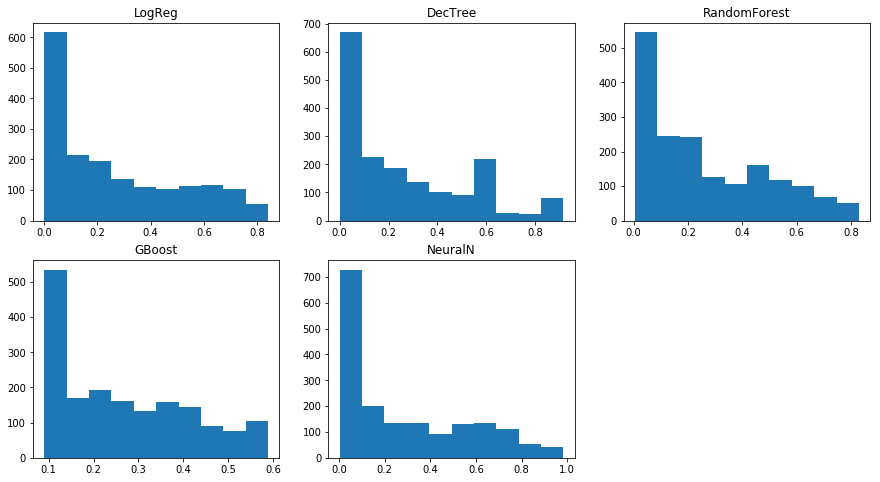

In [122]:
plt.figure(figsize=(15, 8))
i = 230

for model_name, probs in zip(['LogReg','DecTree', 'RandomForest', 'GBoost', 'NeuralN'],
                             [lr_probs,dt_probs, rf_probs, gb_probs, nn_probs]):
    i += 1
    plt.subplot(i)
    plt.hist(probs)
    plt.title(model_name)
    
plt.show()

In [123]:
import numpy as np
print('Churn rate predicted by Random Forest classifier on test set:',np.mean(rf_probs))
print('Churn rate predicted by Decision Tree classifier on test set:',np.mean(dectree_probs))
print('Churn rate predicted by Logistic Regression classifier on test set:',np.mean(lr_probs))
print('Churn rate predicted by Neural Network on test set:',np.mean(nn_probs))
print('Churn rate predicted by Gradient Boosting classifier on test set:',np.mean(gb_probs))

Churn rate predicted by Random Forest classifier on test set: 0.26350579111734707
Churn rate predicted by Decision Tree classifier on test set: 0.2654297614539947
Churn rate predicted by Logistic Regression classifier on test set: 0.26404537656051946
Churn rate predicted by Neural Network on test set: 0.27963161009975124
Churn rate predicted by Gradient Boosting classifier on test set: 0.2652987555242602


## Comparison of Roc-Auc Score

In [124]:
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_probs)

In [125]:
pd.DataFrame({'train_ROC': [lr_auc_train, dt_auc_train, rf_auc_train, gb_auc_train, nn_auc_train],
              'test_ROC': [lr_auc, dt_auc, rf_auc, gb_auc, nn_auc]},
             index=['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Neural Network'])

,train_ROC,test_ROC
Logistic Regression,0.854447,0.827172
Decision Tree,0.863177,0.823680
Random Forest,0.868926,0.829045
Gradient Boosting,0.849405,0.822067
Neural Network,0.864066,0.829115


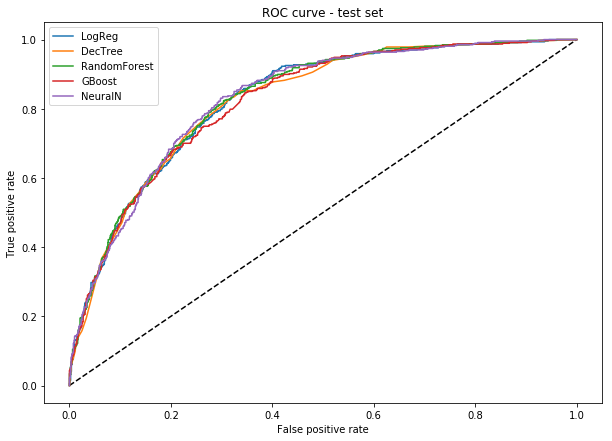

In [126]:
plt.figure(1, figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(lr_fpr, lr_tpr, label='LogReg')
plt.plot(dt_fpr, dt_tpr, label='DecTree')
plt.plot(rf_fpr, rf_tpr, label='RandomForest')
plt.plot(gb_fpr, gb_tpr, label='GBoost')
plt.plot(nn_fpr, nn_tpr, label='NeuralN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - test set')
plt.legend(loc='best')
plt.show()

## Accuracy, Precision, Recall and F1 Score

In [134]:
pd.DataFrame({'Accuracy': [accuracy_score(y_test,lr_preds),accuracy_score(y_test,dt_preds),accuracy_score(y_test,rf_preds),precision_score(y_test,gb_preds), precision_score(y_test,nn_preds)],
            'Precision': [precision_score(y_test,lr_preds),precision_score(y_test,dt_preds),precision_score(y_test,rf_preds),precision_score(y_test,gb_preds), precision_score(y_test,nn_preds)],
              'Recall': [recall_score(y_test,lr_preds),recall_score(y_test,dt_preds),recall_score(y_test,rf_preds),recall_score(y_test,gb_preds),recall_score(y_test,nn_preds)],
             'F1 Score':[f1_score(y_test,lr_preds),f1_score(y_test,dt_preds),f1_score(y_test,rf_preds),f1_score(y_test,gb_preds),f1_score(y_test,nn_preds)]},
             index=['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Neural Network'])

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.787621,0.618321,0.520343,0.565116
Decision Tree,0.787621,0.621410,0.509636,0.560000
Random Forest,0.791028,0.648649,0.462527,0.540000
Gradient Boosting,0.722892,0.722892,0.256959,0.379147
Neural Network,0.583514,0.583514,0.576017,0.579741


### Second approach: probability bands

A second approach follows the idea to divide the customers between more than 2 outputs: we could have, for example, very risky, medium risky, medium good and very good customers.

In [128]:
lr_probs_tot = lr_probs_train + lr_probs
y_tot = y.append(y_test)

In [129]:
quantiles = list(np.quantile(lr_probs_tot, q=np.arange(10) / 10)) + [1]
quantiles

[0.0013919833623350461,
 0.009937907498183619,
 0.027640999667515764,
 0.05911289177238359,
 0.1133512026533246,
 0.18854214049649315,
 0.270492743312208,
 0.3939907054893665,
 0.5339562379214506,
 0.6624407920692145,
 1]

In [130]:
df_perc = pd.DataFrame(columns=['p_inf', 'p_sup', 'p_avg', 'loans', 'bad_loans', 'bad_loans_perc'])
for i in range(len(quantiles) - 1):
    p = [x for x in lr_probs_tot if quantiles[i+1] > x >= quantiles[i]]
    q = y_tot.loc[[quantiles[i+1] > x >= quantiles[i] for x in lr_probs_tot]]
    df_perc.loc[i+1] = [quantiles[i], quantiles[i+1], np.mean(p), q.count(), q.sum(), q.mean()]

In [131]:
df_perc.sort_values('p_inf', ascending=False, inplace=True)
df_perc

,p_inf,p_sup,p_avg,loans,bad_loans,bad_loans_perc
10,0.662441,1.000000,0.734487,705.0,541.0,0.767376
9,0.533956,0.662441,0.599081,704.0,417.0,0.592330
8,0.393991,0.533956,0.463738,704.0,292.0,0.414773
7,0.270493,0.393991,0.330893,704.0,235.0,0.333807
6,0.188542,0.270493,0.225503,705.0,152.0,0.215603
5,0.113351,0.188542,0.149852,704.0,110.0,0.156250
4,0.059113,0.113351,0.083251,704.0,65.0,0.092330
3,0.027641,0.059113,0.042190,704.0,30.0,0.042614
2,0.009938,0.027641,0.017457,704.0,20.0,0.028409
1,0.001392,0.009938,0.005172,705.0,7.0,0.009929


In [132]:
df_perc['loans_cum'] = df_perc['loans'].cumsum()
df_perc['bad_loans_cum'] = df_perc['bad_loans'].cumsum()
df_perc['bad_loans_perc_cum'] = df_perc['bad_loans_cum'] / df_perc['loans_cum']
df_perc

,p_inf,p_sup,p_avg,loans,bad_loans,bad_loans_perc,loans_cum,bad_loans_cum,bad_loans_perc_cum
10,0.662441,1.000000,0.734487,705.0,541.0,0.767376,705.0,541.0,0.767376
9,0.533956,0.662441,0.599081,704.0,417.0,0.592330,1409.0,958.0,0.679915
8,0.393991,0.533956,0.463738,704.0,292.0,0.414773,2113.0,1250.0,0.591576
7,0.270493,0.393991,0.330893,704.0,235.0,0.333807,2817.0,1485.0,0.527157
6,0.188542,0.270493,0.225503,705.0,152.0,0.215603,3522.0,1637.0,0.464793
5,0.113351,0.188542,0.149852,704.0,110.0,0.156250,4226.0,1747.0,0.413393
4,0.059113,0.113351,0.083251,704.0,65.0,0.092330,4930.0,1812.0,0.367546
3,0.027641,0.059113,0.042190,704.0,30.0,0.042614,5634.0,1842.0,0.326944
2,0.009938,0.027641,0.017457,704.0,20.0,0.028409,6338.0,1862.0,0.293784
1,0.001392,0.009938,0.005172,705.0,7.0,0.009929,7043.0,1869.0,0.265370
